In [2]:
import nbimporter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

###our custom cleaning function
from functions import data_clean

###Read Data file
data_train=pd.read_csv("exercise_01_train.csv")


data_train=data_clean(data_train)
###### Creating seperate array for target variable
labels=data_train["y"]
#### Rest of data(without target variable)
all_data=data_train.drop(columns=["y"])

index=all_data.select_dtypes(include=["float","int"]).columns
cols=[i for i in index]

In [2]:
                '''
Training Dataset consists od 40,000 records and 101 features
                '''
data_train.shape

(40000, 101)

In [3]:
#Sample of training Dataset
data_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [4]:
            '''
Every feature in this dataset has some missing values except our target variable.
Values of this missing variable varies from 1 to 15 with median at 8
            
            '''

print("max no. of missing values in target variable:",data_train["y"].isnull().sum())
print("max no. of missing values:",data_train.isnull().sum().max())
print("median no. of missing values:",data_train.isnull().sum().median())
print("min no. of missing values:",all_data.isnull().sum().min())
print("columns with missing values",len(data_train.columns[data_train.isnull().sum()!=0]))
            

max no. of missing values in target variable: 0
max no. of missing values: 15
median no. of missing values: 8.0
min no. of missing values: 1
columns with missing values 100


In [5]:
   ''''
   Data set mainly consists of float,int and object data types
   '''
data_train.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

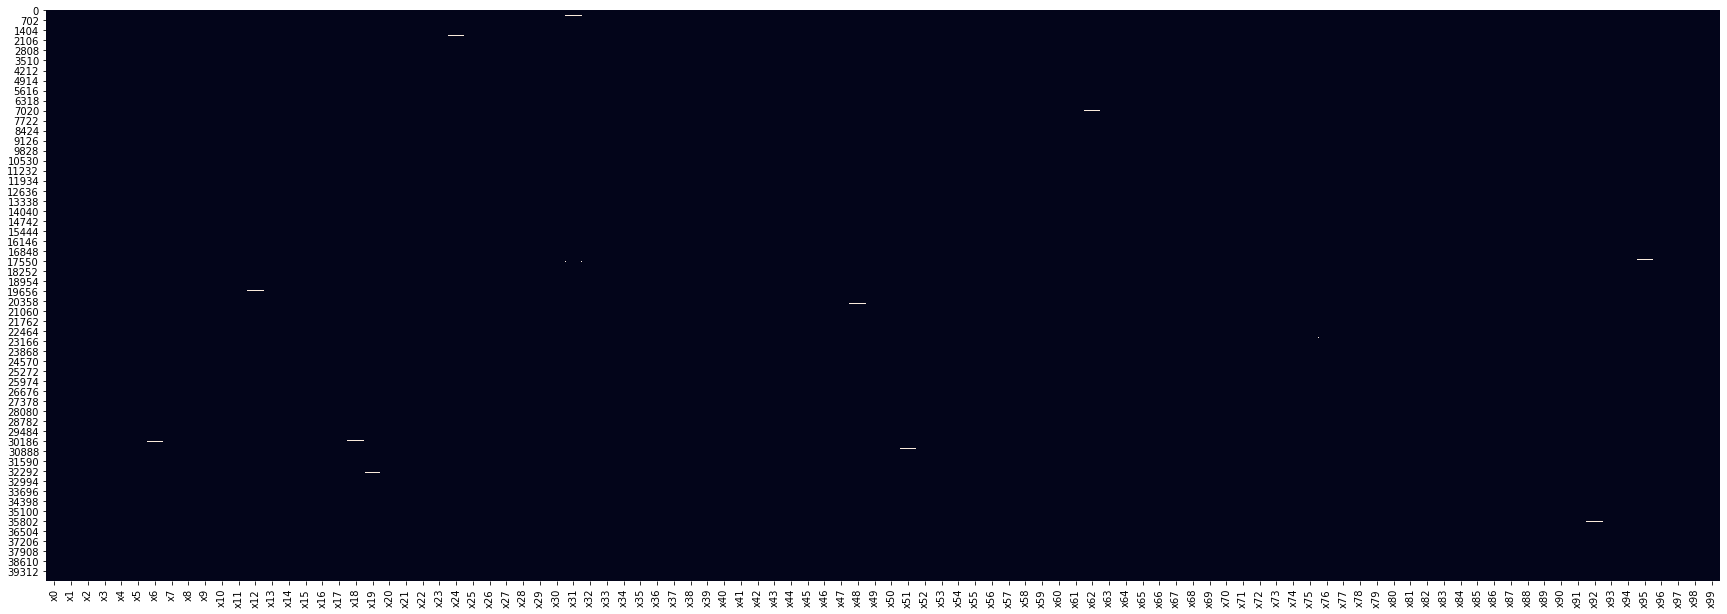

In [177]:
    '''
    The graph below is a heatmap for missing values.It generally shows the occurence of 
    missing values(Sparse or chunks).
    It also shows correlation in occurence of missing values. However for this dataset missing values 
    are sparse and correlation of missing values isnt significant.Hence median imputation strategy f
    or numeric variables
    is recommended as missing values are few and sparse.
    For categorical variables a new category called "Missing" wil be created to deal with 
    places where data isnt available 
        
    '''
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 10.5)
sns.heatmap(all_data.isnull(), cbar=False)
plt.show()

0    31953
1     8047
Name: y, dtype: int64


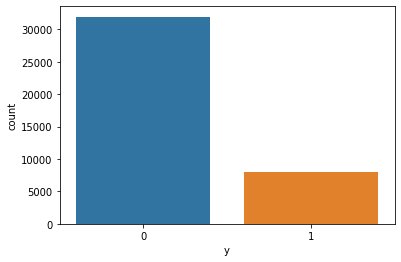

In [7]:
'''
The dataset does suffer from imbalance with about nearly 4:1 ratio for 0 to 1 labels in the training dataset
'''
print(data_train.y.value_counts())
sns.countplot(x="y",data=data_train)
plt.show()


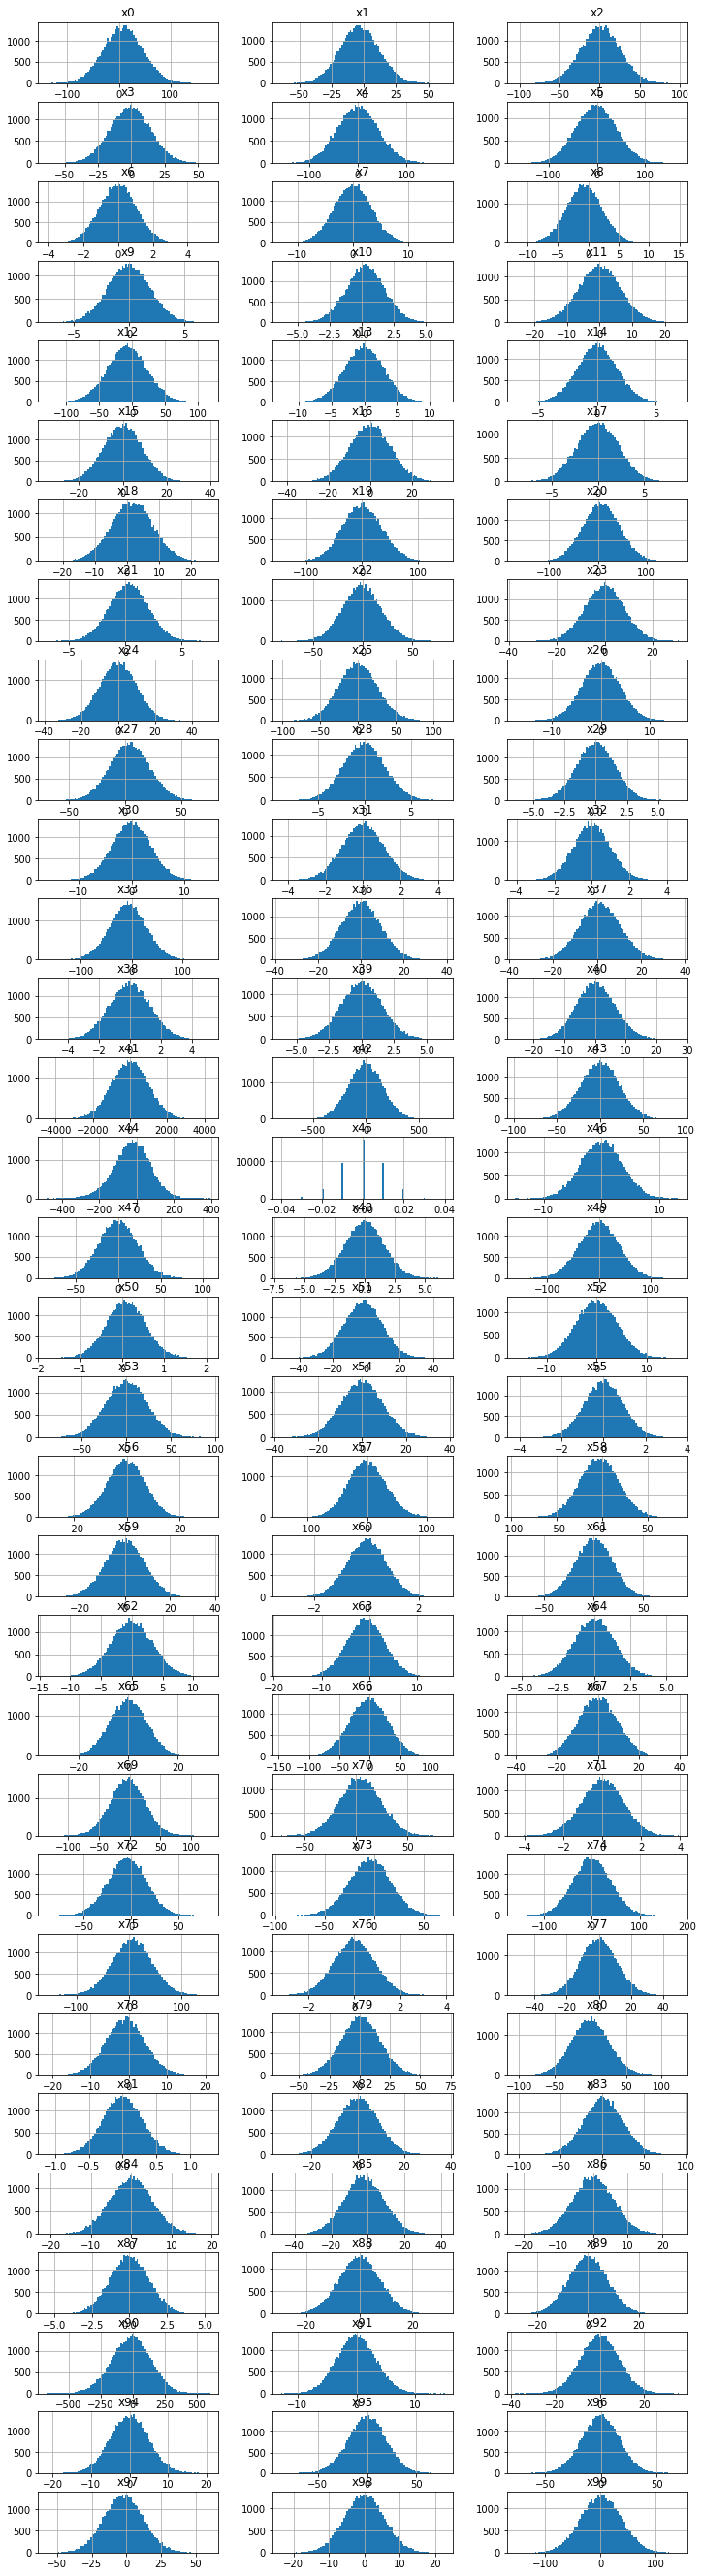

In [28]:
            ''''
    Each feature  follows a normal distribution centered around mean 
             
            ''''


import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        data_train.hist(column = cols[i], bins = 100, ax=axis)
        i = i+1

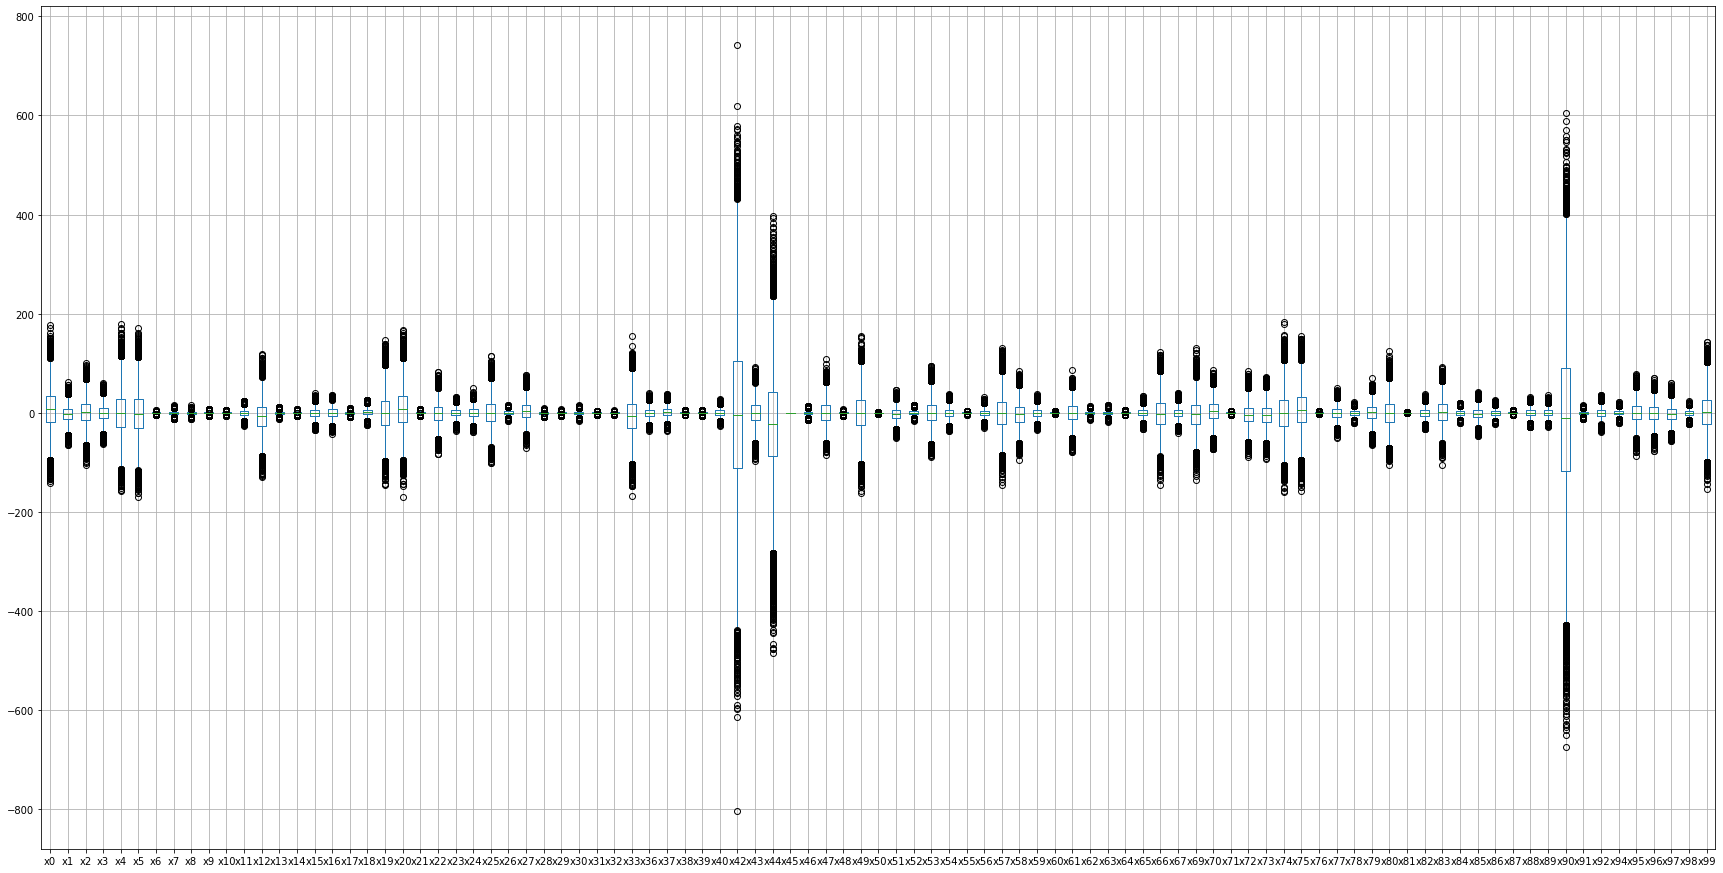

In [38]:
    ''' visualizing box plots of all features on their original scale and dropping feature x41'''
    '''All features have outliers but they seem to be uniform in all features hence may not need special treatment'''


import matplotlib
all_data.drop(columns=["x41"]).boxplot(figsize=(30,15.5))


plt.show()

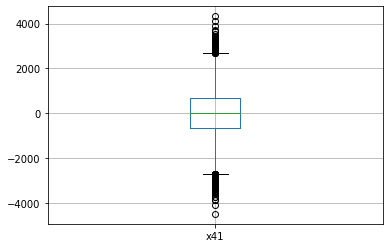

In [44]:
'''visualizing feature x41 seperately due to its extreme range as compared to other features'''
'''Outliers similar to rest of the features hence no special treatment needed'''
all_data.boxplot(column=["x41"])

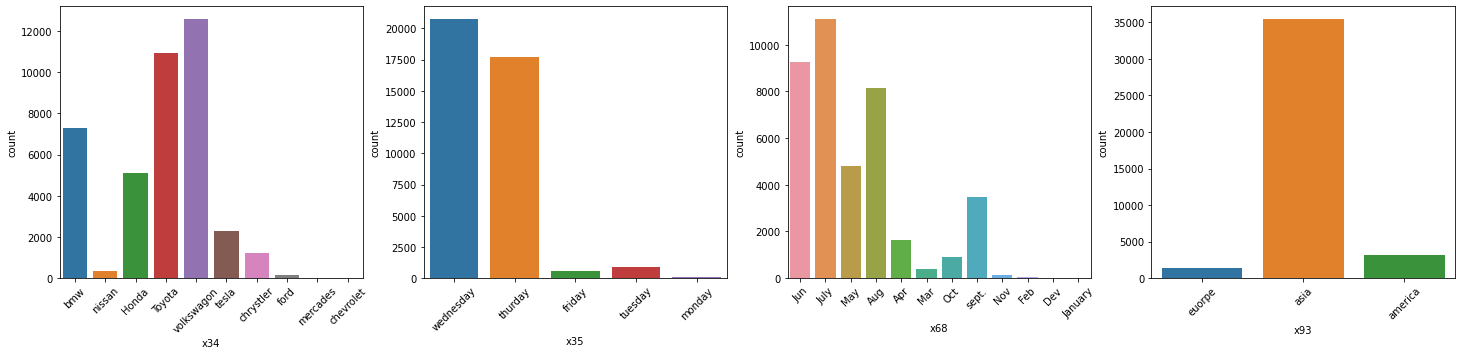

In [2]:
'''Visualizing Distribution of classes in categorical variables '''
'''x34 has very few representations of nissan and ford cars'''
'''x35 has very few representations of Mon , Tue, Friday '''
'''x93 has major category of asia while rest have very few values'''
fig, axs = plt.subplots(ncols=4)

i = 0
fig.set_size_inches(25, 5)
cols=all_data.select_dtypes(exclude=["float","int"]).columns
for v in axs:

            chart=sns.countplot(cols[i],data=all_data,ax=axs[i])
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
            
            i = i+1

In [3]:
""""
Data cleaning has been performed on variable x35 with data_clean function. Multiple categories of Wed,Thurday and Friday
were combined into the respective days
""""
cat_col=all_data.select_dtypes(exclude=["float","int"]).columns
for col in cat_col :
    print(col,'\n')
    print(all_data[col].value_counts(dropna=False),'\n')

x34 

volkswagon    12572
Toyota        10946
bmw            7304
Honda          5129
tesla          2275
chrystler      1223
nissan          336
ford            165
mercades         32
chevrolet        11
NaN               7
Name: x34, dtype: int64 

x35 

wednesday    20725
thurday      17733
tuesday        929
friday         547
monday          56
NaN             10
Name: x35, dtype: int64 

x68 

July       11088
Jun         9279
Aug         8155
May         4788
sept.       3466
Apr         1641
Oct          926
Mar          409
Nov          156
Feb           54
Dev           18
January       11
NaN            9
Name: x68, dtype: int64 

x93 

asia       35409
america     3136
euorpe      1448
NaN            7
Name: x93, dtype: int64 

